## Review

Hi Raymond. My name is Soslan. I'm reviewing your project. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

You did correctly almost all the checkpoints in the project. Can you just spend extra time filling missed values? Because you just filled them without an explanation of your decision. Also as an advice, you can add some plots to make your project visually better and easier to read.

---

## Review (2)

Thank you for update. I'm accepting your project. Goood luck with future learning.

---

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np

apt_sales = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
apt_sales.info()
apt_sales.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
display(apt_sales.tail(10))
"This is a last line"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Saint Peterburg,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Saint Peterburg,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Saint Peterburg,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Tikhvin,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Petergof,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Saint Peterburg,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Tosno,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,Rozhdestveno village,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Saint Peterburg,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,Novyy Uchkvoz village,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'This is a last line'

### Conclusion

The data has values that are missing that need to be dealt with before analysis can be done.

<div class="alert alert-success" role="alert">
Agree :)
</div>

### Step 2. Data preprocessing

In [3]:
#Fill the NaN values of these columns with 0
apt_sales['balcony'] = apt_sales['balcony'].fillna(0)
apt_sales['living_area'] = apt_sales['living_area'].fillna(0)
apt_sales['kitchen_area'] = apt_sales['kitchen_area'].fillna(0)
apt_sales['parks_around3000'] = apt_sales['parks_around3000'].fillna(0)
apt_sales['ponds_around3000'] = apt_sales['ponds_around3000'].fillna(0)
apt_sales['cityCenters_nearest'] = apt_sales['cityCenters_nearest'].fillna(0)


#Check if the missing data has been changed successfully
apt_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#Fill the NaN values of these columns with the avg amount of their respective columns
avg_ceil_height = apt_sales['ceiling_height'].mean()
apt_sales['ceiling_height'] = apt_sales['ceiling_height'].fillna(avg_ceil_height)

avg_airports_nearest = apt_sales['airports_nearest'].mean()
apt_sales['airports_nearest'] = apt_sales['airports_nearest'].fillna(avg_airports_nearest)

avg_parks_nearest = apt_sales['parks_nearest'].mean()
apt_sales['parks_nearest'] = apt_sales['parks_nearest'].fillna(avg_parks_nearest)

avg_ponds_nearest = apt_sales['ponds_nearest'].mean()
apt_sales['ponds_nearest'] = apt_sales['ponds_nearest'].fillna(avg_ponds_nearest)

avg_floors = apt_sales['floors_total'].mean()
apt_sales['floors_total'] = apt_sales['floors_total'].fillna(avg_floors)

#Check if the missing data has been changed successfully
apt_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around30

Data might have been missing from the columns due to human error as it was input or maybe could've been due to different 
formatting thus resulting in NaN values

In [5]:
#Change data types of certain columns into int 
apt_sales['floors_total'] = apt_sales['floors_total'].astype('int')
apt_sales['balcony'] = apt_sales['balcony'].astype('int')


#Check if the changes went through
apt_sales.info()


#Data types were changed into int because the column data makes more sense as a whole number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3000  

<div class="alert alert-danger" role="alert">
You changed part of the missed data with 0s and part with means but you have to write a short explanation of why you decide to do so. 
</div>

I decided to change the missing values in balcony, living area, kitchen area, parks around 3000, ponds around 3000, and city centers nearest to 0 because I believe that these were due to human error as the data was entered into the spreadsheet.

I decided to change the missing values in ceiling height, airports nearest, parks nearest, ponds nearest, floors total to the average in their respective columns because there should be a value in those columns, but since they weren't in there initially, I chose to use the mean to best estimate the number that could be there.

### Step 3. Make calculations and add them to the table

In [6]:
#The price per square meter
apt_sales['price_sq_meter'] = apt_sales['last_price'] / apt_sales['total_area']

#Check the new columns
apt_sales.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,NaN,...,0,Saint Peterburg,18863.0,16028.0,1.0,482.000000,2.0,755.0000,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11,18.6,1,NaN,...,2,Shushary village,12817.0,18603.0,0.0,490.804555,0.0,517.9809,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5,34.3,4,NaN,...,0,Saint Peterburg,21741.0,13933.0,1.0,90.000000,2.0,574.0000,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14,0.0,9,NaN,...,0,Saint Peterburg,28098.0,6800.0,2.0,84.000000,3.0,234.0000,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,NaN,...,0,Saint Peterburg,31856.0,8098.0,2.0,112.000000,1.0,48.0000,121.0,100000.000000


In [7]:
#The day of the week, month, and year that the ad was published
apt_sales['first_day_exposition'] = pd.to_datetime(apt_sales['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
apt_sales['day_of_week'] = apt_sales['first_day_exposition'].dt.day_name()
apt_sales['day'] = apt_sales['first_day_exposition'].dt.day
apt_sales['month_name'] = apt_sales['first_day_exposition'].dt.month_name()
apt_sales['month'] = apt_sales['first_day_exposition'].dt.month
apt_sales['year'] = apt_sales['first_day_exposition'].dt.year

apt_sales.info()
#Check the new columns
apt_sales.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_arou

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,day_of_week,day,month_name,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,NaN,...,482.000000,2.0,755.0000,NaN,120370.370370,Thursday,7,March,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,NaN,...,490.804555,0.0,517.9809,81.0,82920.792079,Tuesday,4,December,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,NaN,...,90.000000,2.0,574.0000,558.0,92785.714286,Thursday,20,August,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,0.0,9,NaN,...,84.000000,3.0,234.0000,424.0,408176.100629,Friday,24,July,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,NaN,...,112.000000,1.0,48.0000,121.0,100000.000000,Tuesday,19,June,6,2018


In [8]:
#Location of floor in apartment
def floor_location(current, total):
    '''
    Checks the current floor of apartment room.
    '''
    if current == total:
        return 'last'
    elif current == 1:
        return 'first'
    else:
        return 'other'

apt_sales['current_floor'] = apt_sales.apply(lambda x: floor_location(x['floor'], x['floors_total']), axis=1)  

#Check the new columns
apt_sales.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,day_of_week,day,month_name,month,year,current_floor
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,NaN,...,2.0,755.0000,NaN,120370.370370,Thursday,7,March,3,2019,other
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,NaN,...,0.0,517.9809,81.0,82920.792079,Tuesday,4,December,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,NaN,...,2.0,574.0000,558.0,92785.714286,Thursday,20,August,8,2015,other
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,0.0,9,NaN,...,3.0,234.0000,424.0,408176.100629,Friday,24,July,7,2015,other
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,NaN,...,1.0,48.0000,121.0,100000.000000,Tuesday,19,June,6,2018,other


In [9]:
#Ratio between the living space and the total area
apt_sales['ratio_living_vs_total'] = apt_sales['living_area'] / apt_sales['total_area']

#Check the new columns
apt_sales.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,day_of_week,day,month_name,month,year,current_floor,ratio_living_vs_total
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,NaN,...,755.0000,NaN,120370.370370,Thursday,7,March,3,2019,other,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,NaN,...,517.9809,81.0,82920.792079,Tuesday,4,December,12,2018,first,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,NaN,...,574.0000,558.0,92785.714286,Thursday,20,August,8,2015,other,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,0.0,9,NaN,...,234.0000,424.0,408176.100629,Friday,24,July,7,2015,other,0.000000
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,NaN,...,48.0000,121.0,100000.000000,Tuesday,19,June,6,2018,other,0.320000


In [10]:
#Ratio between the kitchen space and the total area
apt_sales['ratio_kitchen_vs_total'] = apt_sales['kitchen_area'] / apt_sales['total_area']

#Check the new columns
apt_sales.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_sq_meter,day_of_week,day,month_name,month,year,current_floor,ratio_living_vs_total,ratio_kitchen_vs_total
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,NaN,...,NaN,120370.370370,Thursday,7,March,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,NaN,...,81.0,82920.792079,Tuesday,4,December,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,NaN,...,558.0,92785.714286,Thursday,20,August,8,2015,other,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,0.0,9,NaN,...,424.0,408176.100629,Friday,24,July,7,2015,other,0.000000,0.000000
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,NaN,...,121.0,100000.000000,Tuesday,19,June,6,2018,other,0.320000,0.410000


<div class="alert alert-success" role="alert">
All the calculations were done correctly
</div>

### Step 4. Conduct exploratory data analysis and follow the instructions below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4581be7d10>]],
      dtype=object)

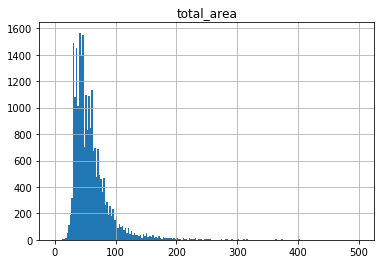

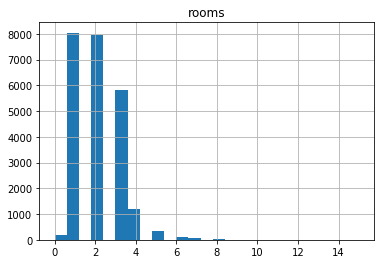

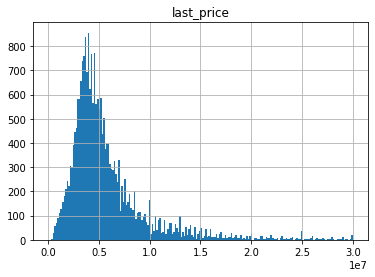

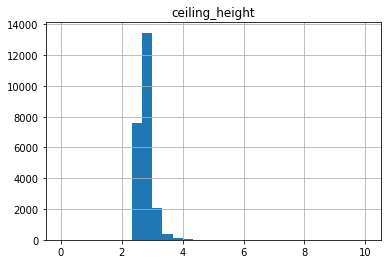

In [11]:
#Histogram of square area, price, number of rooms, and ceiling height
apt_sales.hist('total_area', bins=200, range=(0,500))
apt_sales.hist('rooms', bins=25, range=(0,15))
apt_sales.hist('last_price', bins=200, range=(0,30000000))
apt_sales.hist('ceiling_height', bins=30, range=(0,10))


Average days to complete a sale: 180.88863436982163
Median days to complete a sale: 95.0
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


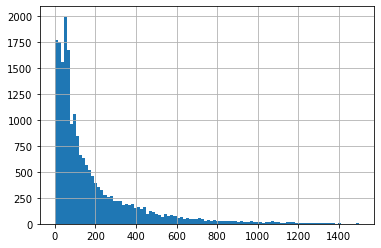

In [12]:
#Examine the time it's taken to sell the apartment and plot a histogram. 
apt_sales['days_exposition'].hist(bins=100, range=(0,1500))

#Calculate the mean and median and explain the average time it usually takes to complete a sale. 
avg_exp = apt_sales['days_exposition'].mean()
print('Average days to complete a sale:', avg_exp)

med_exp = apt_sales['days_exposition'].median()
print('Median days to complete a sale:', med_exp)

#When can a sale be considered to have happened rather quickly or taken an extra long time?
print(apt_sales['days_exposition'].describe())


<div class="alert alert-success" role="alert">
Good
</div>

After analyzing the data, I would consider any time that's shorter than 10 days to be too quick and 
time longer than 800 days to be too long


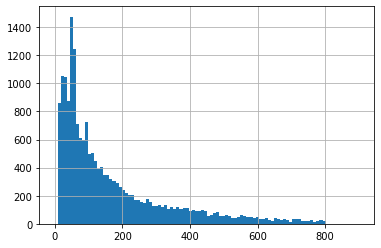

In [13]:
#Remove rare and outlying values and describe the patterns you've discovered.
no_outliers = apt_sales.query('days_exposition < 800 & days_exposition > 10')
no_outliers['days_exposition'].hist(bins=100, range=(0,900))


After removing the outliers, examining the histogram seems to reveal that most of the sales occur before 200 days

In [14]:
#Which factors have had the biggest influence on an apartment’s price? 
#Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), 
#or the proximity to the downtown area. 
print('Correlation btwn value and sq area:', apt_sales['last_price'].corr(apt_sales['total_area']))

print('Correlation btwn value and rooms:', apt_sales['last_price'].corr(apt_sales['rooms']))

print('Correlation btwn value and first floor:', apt_sales['last_price'].corr(apt_sales['current_floor']=='first'))

print('Correlation btwn value and last floor:', apt_sales['last_price'].corr(apt_sales['current_floor']=='last'))

print('Correlation btwn value and downtown:', apt_sales['last_price'].corr(apt_sales['cityCenters_nearest']))

Correlation btwn value and sq area: 0.6536750579657244
Correlation btwn value and rooms: 0.36334284996489546
Correlation btwn value and first floor: -0.05892048747871994
Correlation btwn value and last floor: 0.029318109631245037
Correlation btwn value and downtown: -0.05096092866080519


<div class="alert alert-warning" role="alert">
Correct but some plot visualizing correlation would be nice here
</div>

Analyzing the correlations between the different variables show that the biggest influence on the apartment's price
is the total sq area.

In [15]:
#Also study the correlation to the publication date: day of the week, month, and year.
print('Correlation btwn value and day of week:', apt_sales['last_price'].corr(apt_sales['day']))

print('Correlation btwn value and month:', apt_sales['last_price'].corr(apt_sales['month']))

print('Correlation btwn value and year:', apt_sales['last_price'].corr(apt_sales['year']))

#Analyzing the correlation for the publication date shows that it doesn't affect the value of the apartment's price.

Correlation btwn value and day of week: 0.00917150529824089
Correlation btwn value and month: 0.0027791287507397252
Correlation btwn value and year: -0.04308903619950858


In [16]:
#Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. 
#Determine which ones have the highest and lowest housing prices. 
#You can find this data by name in the ’locality_name’ column.

top_10_names = apt_sales['locality_name'].value_counts().head(10).index
top_10 = apt_sales.query('locality_name in @top_10_names')
print(top_10.pivot_table(index='locality_name', values='price_sq_meter', aggfunc='mean'))


                   price_sq_meter
locality_name                    
Gatchina             68746.146763
Kolpino              75424.579098
Kudrovo village      92473.547576
Murino village       85681.762601
Pargolovo village    90175.913458
Pushkin             103125.819291
Saint Peterburg     114849.008794
Shushary village     78677.364217
Vsevolozhsk          68654.473986
Vyborg               58141.909153


After grouping the data into the top 10 localities and calculating the average price per sq meter, Saint Peterburg has 
the highest housing prices while Vyborg has the lowest housing prices.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


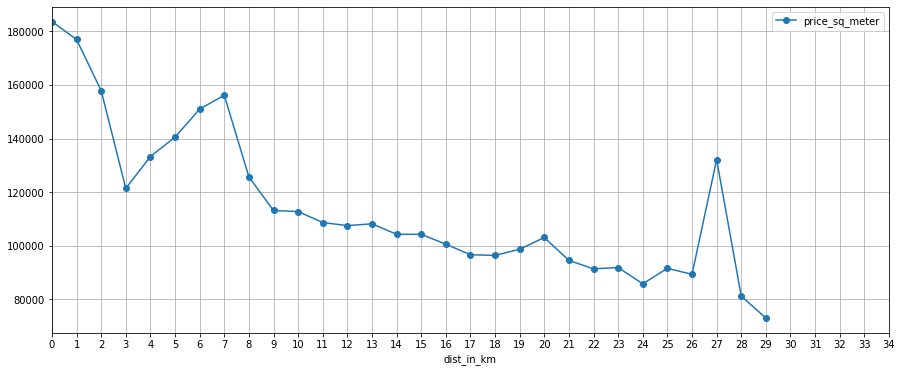

In [17]:
#Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
#Select apartments in Saint Petersburg (‘locality_name’). 
apt_in_petersburg = apt_sales.query('locality_name == "Saint Peterburg"')

#Your task is to pinpoint which area is considered to be downtown. 
#In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. 
apt_in_petersburg['dist_in_km'] = (apt_in_petersburg['cityCenters_nearest'] / 1000).round()

#Next, calculate the average price for each kilometer and 
#plot a graph to display how prices are affected by the distance to the city center. 
#Find a place on the graph where it shifts significantly. That's the downtown border.
price_per_km = apt_in_petersburg.pivot_table(index='dist_in_km', values='price_sq_meter', aggfunc='mean')
price_per_km.plot(style='o-', grid=True, figsize=(15,6), xticks=np.arange(0,35,1))

#After analyzing the bar graph of the avg price for each km, the price shifts the most when it changes from 7km to 8km. 
#That is where the downtown border is located.

<div class="alert alert-success" role="alert">
Agree with you
</div>

In [18]:
#Select all the apartments in the downtown and examine correlations between the following parameters: 
#total area, price, number of rooms, ceiling height. 
downtown_apt = apt_in_petersburg.query('dist_in_km < 7')

print('Correlation btwn downtown and total area:', downtown_apt['dist_in_km'].corr(downtown_apt['total_area']))
print('Correlation btwn downtown and price:', downtown_apt['dist_in_km'].corr(downtown_apt['last_price']))
print('Correlation btwn downtown and number of rooms:', downtown_apt['dist_in_km'].corr(downtown_apt['rooms']))
print('Correlation btwn downtown and ceiling height:', downtown_apt['dist_in_km'].corr(downtown_apt['ceiling_height']))


#Also identify the factors that affect an apartment’s price: 
#number of rooms, floor, distance to the downtown area, and ad publication date. 
'''
factor_apt_price = downtown_apt.pivot_table(index=['rooms', 'floor', 'dist_in_km', 'first_day_exposition'],
                                            values='last_price',
                                           aggfunc = 'mean')
print(factor_apt_price)
'''
print('')
print('Correlation btwn price and rooms:', apt_in_petersburg['last_price'].corr(apt_in_petersburg['rooms']))
print('Correlation btwn price and floor:', apt_in_petersburg['last_price'].corr(apt_in_petersburg['floor']))
print('Correlation btwn price and distance:', apt_in_petersburg['last_price'].corr(apt_in_petersburg['dist_in_km']))
print('Correlation btwn price and ad publication date:', apt_in_petersburg['last_price'].corr(apt_in_petersburg['month']))

#Draw your conclusions. Are they different from the overall deductions about the entire city?

Correlation btwn downtown and total area: -0.04536819056191393
Correlation btwn downtown and price: -0.04673358810215962
Correlation btwn downtown and number of rooms: -0.09629059932751381
Correlation btwn downtown and ceiling height: -0.07190279568628548

Correlation btwn price and rooms: 0.37237533826763347
Correlation btwn price and floor: -0.0008379427208810821
Correlation btwn price and distance: -0.2606135391954825
Correlation btwn price and ad publication date: 2.6940500864503063e-05


After analyzing the data, it would seem that the number of rooms plays the largest part in the price of the apartment.
The price doesn't seem to be too different from the entire city.

<div class="alert alert-warning" role="alert">
Correct but again some plot visualizing correlation would be nice here
</div>

### Step 5. Overall conclusion

After categorizing the data further and creating various graphs, most apartments are sold around 200 days abd the largest influence on the price of an apartment is the total sq area. A closer examination on the city of Saint Petersburg shows that 

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: the price per square meter
- [ ]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [ ]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [ ]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [ ]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [ ]  histograms for each parameter created
- [ ]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [ ]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [ ]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [ ]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [ ]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn